# Using decision trees with the breast cancer dataset 
We will use the `scikit-learn` package and the included breast cancer data set. We will then pickle the model and use it in the API.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

Now loading the required data

In [2]:
from sklearn.datasets import load_breast_cancer

cancer =  load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [4]:
# let's have a look at the description

cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

## Tree visualization

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(465.0, 503.3333333333333, 'worst perimeter <= 106.1\nentropy = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(232.5, 302.0, 'worst concave points <= 0.134\nentropy = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(116.25, 100.66666666666663, 'entropy = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(348.75, 100.66666666666663, 'entropy = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(697.5, 302.0, 'worst concave points <= 0.142\nentropy = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(581.25, 100.66666666666663, 'entropy = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(813.75, 100.66666666666663, 'entropy = 0.03\nsamples = 130\nvalue = [128, 2]')]

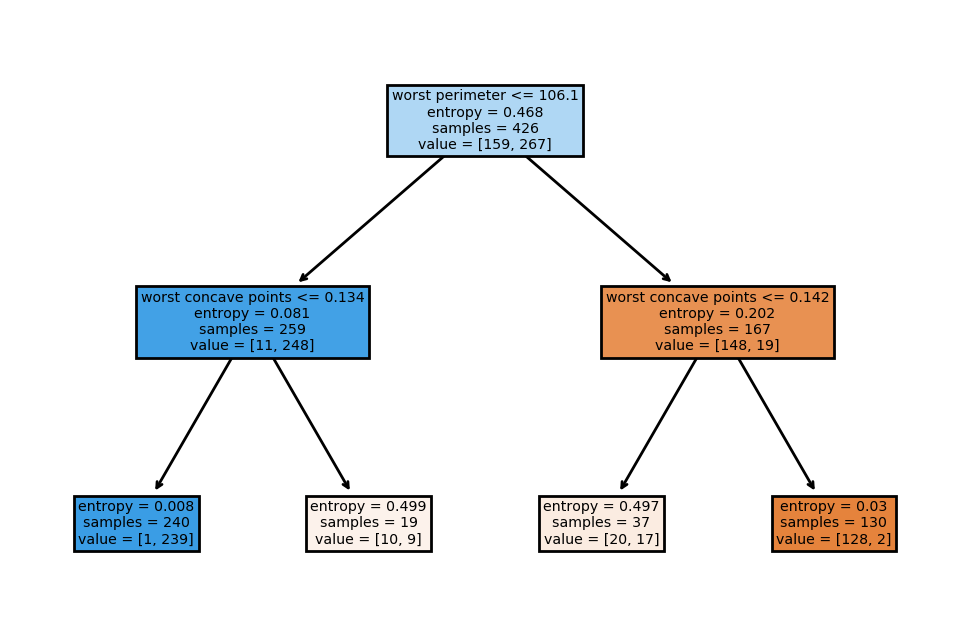

In [6]:
from sklearn.tree import plot_tree

plt.figure(dpi=200)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

## Parameter tuning

[Text(391.375, 249.15, 'worst perimeter <= 106.1\nentropy = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(139.5, 203.85000000000002, 'worst concave points <= 0.134\nentropy = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(62.0, 158.55, 'area error <= 48.975\nentropy = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(31.0, 113.25, 'entropy = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(93.0, 113.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(217.0, 158.55, 'worst texture <= 26.0\nentropy = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(155.0, 113.25, 'worst smoothness <= 0.179\nentropy = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(124.0, 67.94999999999999, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(186.0, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 113.25, 'worst compactness <= 0.263\nentropy = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(248.0, 67.94999999999999, 'worst smoothness <= 0.137\nentropy = 0.5\nsamples = 2\nvalue = [

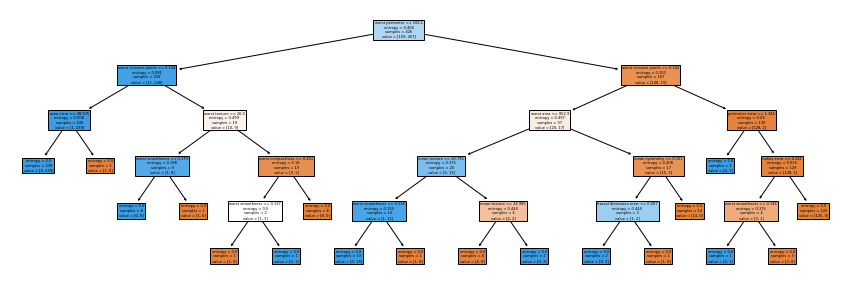

In [7]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

[Text(418.5, 237.82500000000002, 'worst perimeter <= 106.1\nentropy = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 169.875, 'worst concave points <= 0.134\nentropy = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(104.625, 101.92500000000001, 'area error <= 48.975\nentropy = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(52.3125, 33.974999999999994, 'entropy = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(156.9375, 33.974999999999994, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(313.875, 101.92500000000001, 'worst texture <= 26.0\nentropy = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(261.5625, 33.974999999999994, 'entropy = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(366.1875, 33.974999999999994, 'entropy = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(627.75, 169.875, 'worst concave points <= 0.142\nentropy = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(523.125, 101.92500000000001, 'worst radius <= 17.615\nentropy = 0.497\nsamples = 37\nvalue = [20, 17]'),
 

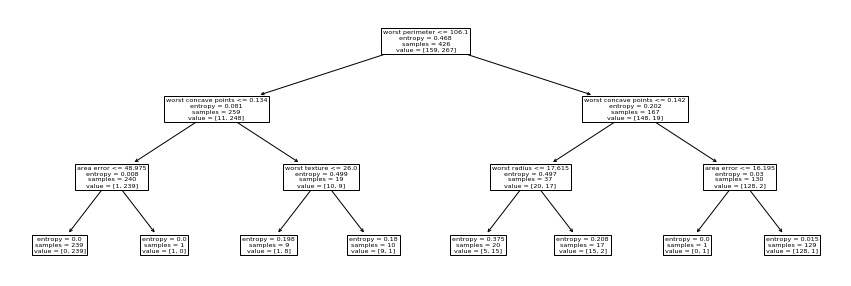

In [8]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=cancer.feature_names)

[Text(167.40000000000003, 199.32, 'worst perimeter <= 106.1\nentropy = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(66.96000000000001, 163.07999999999998, 'worst concave points <= 0.134\nentropy = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(33.480000000000004, 126.83999999999999, 'entropy = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(100.44000000000001, 126.83999999999999, 'worst texture <= 26.0\nentropy = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(66.96000000000001, 90.6, 'entropy = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(133.92000000000002, 90.6, 'entropy = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(267.84000000000003, 163.07999999999998, 'worst concave points <= 0.142\nentropy = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(234.36, 126.83999999999999, 'worst radius <= 17.615\nentropy = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(200.88000000000002, 90.6, 'mean texture <= 20.795\nentropy = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(167.40000000000003, 5

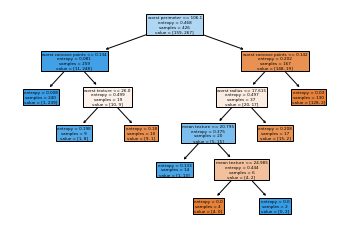

In [9]:
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

[Text(152.1818181818182, 195.696, 'worst perimeter <= 106.1\nentropy = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(91.30909090909091, 152.208, 'worst concave points <= 0.134\nentropy = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(60.872727272727275, 108.72, 'area error <= 48.975\nentropy = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(30.436363636363637, 65.232, 'entropy = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(91.30909090909091, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(121.74545454545455, 108.72, 'entropy = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(213.05454545454546, 152.208, 'worst concave points <= 0.142\nentropy = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(182.61818181818182, 108.72, 'entropy = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(243.4909090909091, 108.72, 'texture error <= 0.431\nentropy = 0.03\nsamples = 130\nvalue = [128, 2]'),
 Text(213.05454545454546, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(273.9

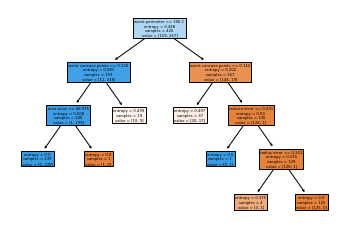

In [10]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

[Text(167.40000000000003, 190.26, 'worst perimeter <= 106.1\nentropy = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(66.96000000000001, 135.9, 'worst concave points <= 0.134\nentropy = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(33.480000000000004, 81.53999999999999, 'entropy = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(100.44000000000001, 81.53999999999999, 'worst texture <= 26.0\nentropy = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(133.92000000000002, 27.180000000000007, 'entropy = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(267.84000000000003, 135.9, 'worst concave points <= 0.142\nentropy = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(234.36, 81.53999999999999, 'worst area <= 952.9\nentropy = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(267.84000000000003, 27.180000000000

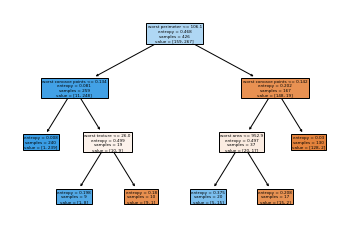

In [11]:
tree = DecisionTreeClassifier(min_impurity_decrease=.01).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

/anaconda3/envs/mlops/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 7)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=No

In [13]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=None, test_size=None,
            train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': ra

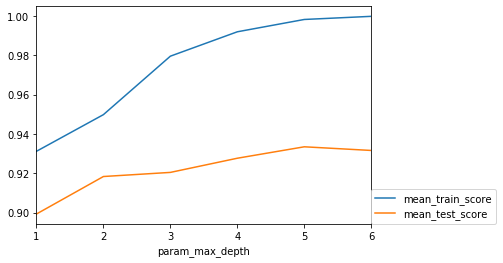

In [14]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

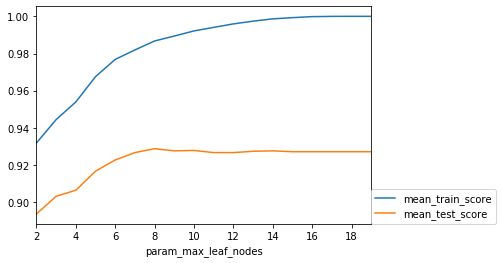

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes': range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100, random_state=1),
                   return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

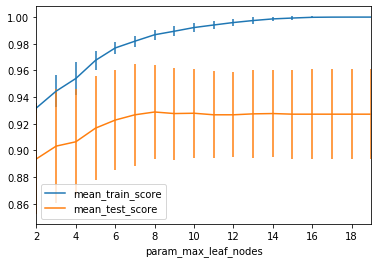

In [16]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [17]:
grid.best_params_


{'max_leaf_nodes': 8}

[Text(167.40000000000003, 199.32, 'worst perimeter <= 106.1\nentropy = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(66.96000000000001, 163.07999999999998, 'worst concave points <= 0.134\nentropy = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(33.480000000000004, 126.83999999999999, 'entropy = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(100.44000000000001, 126.83999999999999, 'worst texture <= 26.0\nentropy = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(66.96000000000001, 90.6, 'entropy = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(133.92000000000002, 90.6, 'entropy = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(267.84000000000003, 163.07999999999998, 'worst concave points <= 0.142\nentropy = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(234.36, 126.83999999999999, 'worst area <= 952.9\nentropy = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(200.88000000000002, 90.6, 'mean texture <= 20.795\nentropy = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(167.40000000000003, 54.3

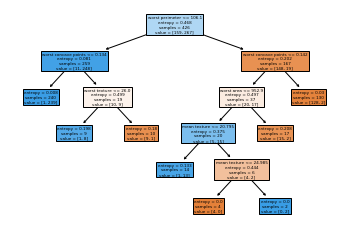

In [18]:
plot_tree(grid.best_estimator_, feature_names=cancer.feature_names, filled=True)


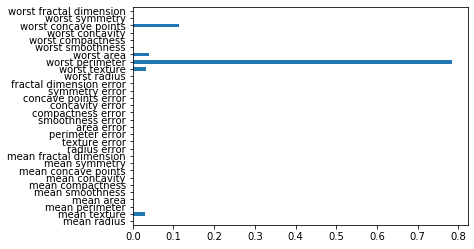

In [19]:
pd.Series(grid.best_estimator_.feature_importances_,
          index=cancer.feature_names).plot(kind="barh")